# Online Shoppers Intention

### Performing Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

### Reading the data

In [46]:
df = pd.read_csv(r'D:\DATA SCIENCE\GitHub\machineLearning\online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


### Column Names

In [47]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

### Columns and their meanings

- 'Administrative' = no. of administrative pages visited
- 'Administrative_Duration' = time spent on administrative pages
- 'Informational' = no. of informational pages visited
- 'Informational_Duration' = time spent on informative pages
- 'ProductRelated' = no. of product pages visited
- 'ProductRelated_Duration' = time spent on product pages
- 'BounceRates' = no. of people who enter the site and leave without requesting anything(they view only one page)
- 'ExitRates' = total amt of exits/ total amt of visits in a definitive time duration
- 'PageValues' = avg value of a web page a user visited before completing an e-commerce transaction
- 'SpecialDay' = proximity to some special day
- 'Month' = month of the year
- 'OperatingSystems' = label encoded OS
- 'Browser' = label encoded browser
- 'Region' = label encoded region
- 'TrafficType' = label encoded traffic type
- 'VisitorType' = returning/new/other
- 'Weekend' = whether date of visiting the site is weekend (boolean)
- 'Revenue' = target (boolean)

### Information of kind of data

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12316 non-null  float64
 1   Administrative_Duration  12316 non-null  float64
 2   Informational            12316 non-null  float64
 3   Informational_Duration   12316 non-null  float64
 4   ProductRelated           12316 non-null  float64
 5   ProductRelated_Duration  12316 non-null  float64
 6   BounceRates              12316 non-null  float64
 7   ExitRates                12316 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

### Number of missing values in each column

In [49]:
df.isna().sum()

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

### Kind and number of values in Categorical columns

In [50]:
for i in df.select_dtypes(include='O').columns:
    print(i,'\n', df[i].value_counts())
    print('*****')

Month 
 May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64
*****
VisitorType 
 Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64
*****


In [51]:
df['Weekend'] = np.where(df['Weekend']==False,0,1)

In [52]:
df['Revenue'] = np.where(df['Revenue']==False,0,1)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12316 non-null  float64
 1   Administrative_Duration  12316 non-null  float64
 2   Informational            12316 non-null  float64
 3   Informational_Duration   12316 non-null  float64
 4   ProductRelated           12316 non-null  float64
 5   ProductRelated_Duration  12316 non-null  float64
 6   BounceRates              12316 non-null  float64
 7   ExitRates                12316 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

<AxesSubplot:xlabel='Month', ylabel='Revenue'>

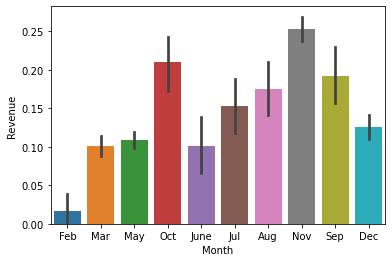

In [54]:
sns.barplot(x=df['Month'], y=df['Revenue'])

#### Inference: Maximum no of purchases in November

<AxesSubplot:xlabel='Month', ylabel='count'>

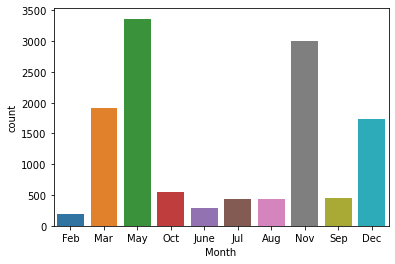

In [55]:
sns.countplot(x=df['Month']) 

#### Inference: Maximum no of visits in May

<AxesSubplot:xlabel='Weekend', ylabel='Revenue'>

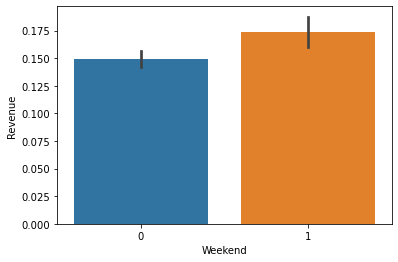

In [56]:
sns.barplot(x=df['Weekend'], y=df['Revenue'])

#### Inference: More revenue on weekends

In [57]:
df['SpecialDay'].value_counts()

0.0    11079
0.6      351
0.8      325
0.4      243
0.2      178
1.0      154
Name: SpecialDay, dtype: int64

In [58]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0,0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0,0
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0,0
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,1,0


In [59]:
df.groupby('VisitorType')['Revenue'].sum()

VisitorType
New_Visitor           422
Other                  16
Returning_Visitor    1470
Name: Revenue, dtype: int32

In [60]:
df.VisitorType.value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

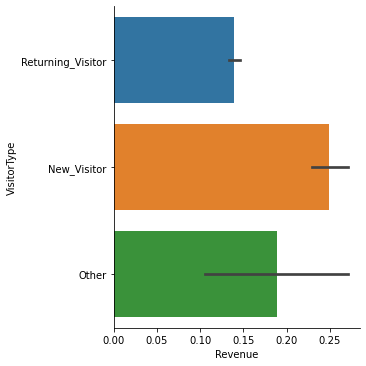

In [61]:
# revenue vs visitor type
sns.catplot(x='Revenue', y='VisitorType',data=df,kind='bar')

#### Inference: If the visitor is new, the chances of buying a product are more
#### Returning visitors fetch maximum profit becase they're more in number
#### Difficult to comment about Other visitors since confidence iterval is large

In [62]:
df[df['Month']=='Feb'][['Month','SpecialDay']]

,Month,SpecialDay
0,Feb,0.0
1,Feb,0.0
2,Feb,0.0
3,Feb,0.0
4,Feb,0.0
...,...,...
179,Feb,0.6
180,Feb,0.0
181,Feb,0.6
182,Feb,0.0


In [63]:
OperatingSystems	Browser	Region	TrafficType

SyntaxError: invalid syntax (<ipython-input-63-2030749ddb7e>, line 1)

In [ ]:
sns.catplot(x='OperatingSystems', data=df,kind='count')

#### Widely used OS to login = no. 2

In [ ]:
sns.catplot(x='Browser', data=df,kind='count')

#### Widely used OS to login = no. 2

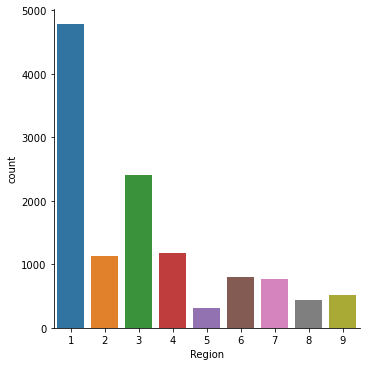

In [64]:
sns.catplot(x='Region', data=df,kind='count') 

#### Maximum logins from region = no. 2

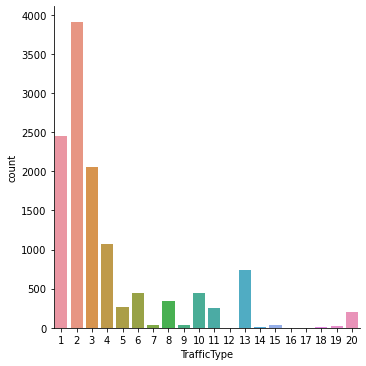

In [65]:
sns.catplot(x='TrafficType', data=df,kind='count') 

#### Maximum visits from region = no. 2

In [66]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [67]:
df.groupby('SpecialDay')['Revenue'].sum()

SpecialDay
0.0    1831
0.2      14
0.4      13
0.6      29
0.8      11
1.0      10
Name: Revenue, dtype: int32

In [68]:
df[['Administrative','Revenue']]

,Administrative,Revenue
0,0.0,0
1,0.0,0
2,0.0,0
3,0.0,0
4,0.0,0
...,...,...
12325,3.0,0
12326,0.0,0
12327,0.0,0
12328,4.0,0


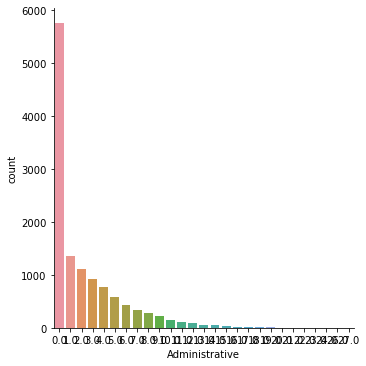

In [69]:
sns.catplot(x='Administrative', data=df,kind='count') 

In [70]:
df['Administrative'].value_counts()

0.0     5754
1.0     1354
2.0     1114
3.0      915
4.0      765
5.0      575
6.0      432
7.0      338
8.0      287
9.0      225
10.0     153
11.0     105
12.0      86
13.0      56
14.0      44
15.0      38
16.0      24
17.0      16
18.0      12
19.0       6
24.0       4
22.0       4
23.0       3
21.0       2
20.0       2
26.0       1
27.0       1
Name: Administrative, dtype: int64

### Admininstrative duration vs Bounce Rates

In [71]:
df[['Administrative_Duration','BounceRates']]

,Administrative_Duration,BounceRates
0,0.0,0.200000
1,0.0,0.000000
2,-1.0,0.200000
3,0.0,0.050000
4,0.0,0.020000
...,...,...
12325,145.0,0.007143
12326,0.0,0.000000
12327,0.0,0.083333
12328,75.0,0.000000


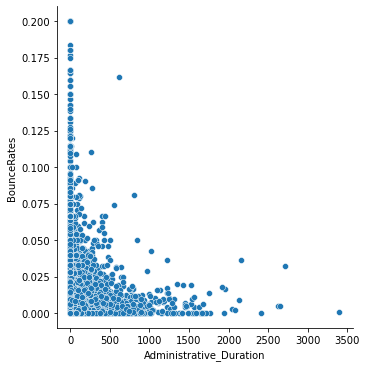

In [72]:
sns.relplot(x="Administrative_Duration",y="BounceRates",kind="scatter",data=df)

#### Inference: With increase in administrative_duration bounceRates decreases
#### People spending more time on administrative page are less likely to visit just one page of the website and leave

### Informative duration vs Bounce Rates

In [73]:
df[['Informational_Duration','BounceRates']]

,Informational_Duration,BounceRates
0,0.0,0.200000
1,0.0,0.000000
2,-1.0,0.200000
3,0.0,0.050000
4,0.0,0.020000
...,...,...
12325,0.0,0.007143
12326,0.0,0.000000
12327,0.0,0.083333
12328,0.0,0.000000


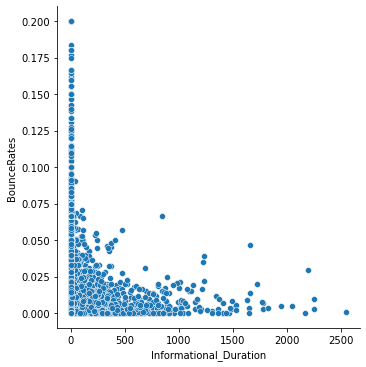

In [74]:
sns.relplot(x="Informational_Duration",y="BounceRates",kind="scatter",data=df)

#### Inference: With increase in information_duration bounceRates decreases, but there are outliers
#### People spending more time on informative page are less likely to visit just one page of the website and leave

### Product Related duration vs Bounce Rates

In [75]:
df[['ProductRelated_Duration','BounceRates']]

,ProductRelated_Duration,BounceRates
0,0.000000,0.200000
1,64.000000,0.000000
2,-1.000000,0.200000
3,2.666667,0.050000
4,627.500000,0.020000
...,...,...
12325,1783.791667,0.007143
12326,465.750000,0.000000
12327,184.250000,0.083333
12328,346.000000,0.000000


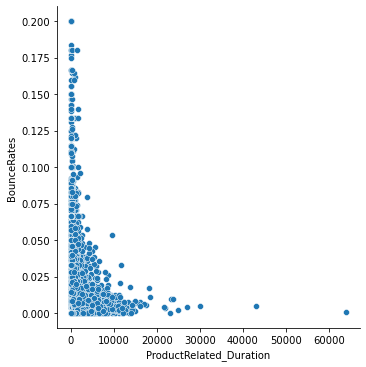

In [76]:
sns.relplot(x="ProductRelated_Duration",y="BounceRates",kind="scatter",data=df)

#### Inference: With increase in ProductRelated_Duration bounceRates decreases considerably
#### People spending more time on ProductRelated page are less likely to visit just one page of the website and leave

### Administrative duration vs Exit Rates

In [77]:
df[['Administrative_Duration','ExitRates']]

,Administrative_Duration,ExitRates
0,0.0,0.200000
1,0.0,0.100000
2,-1.0,0.200000
3,0.0,0.140000
4,0.0,0.050000
...,...,...
12325,145.0,0.029031
12326,0.0,0.021333
12327,0.0,0.086667
12328,75.0,0.021053


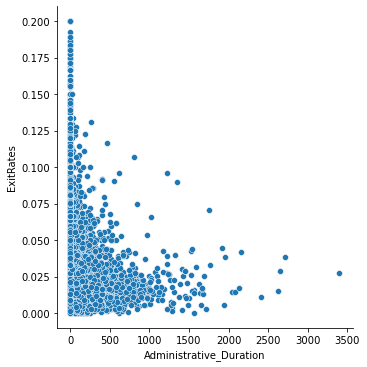

In [78]:
sns.relplot(x="Administrative_Duration",y="ExitRates",kind="scatter",data=df)

### Informative duration vs Exit Rates

In [79]:
df[['Informational_Duration','ExitRates']]

,Informational_Duration,ExitRates
0,0.0,0.200000
1,0.0,0.100000
2,-1.0,0.200000
3,0.0,0.140000
4,0.0,0.050000
...,...,...
12325,0.0,0.029031
12326,0.0,0.021333
12327,0.0,0.086667
12328,0.0,0.021053


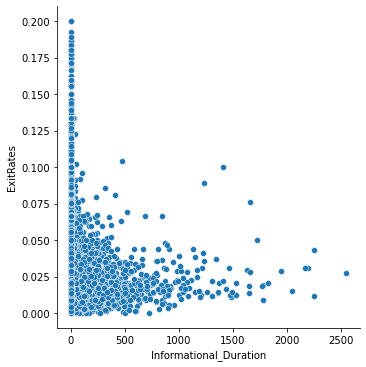

In [80]:
sns.relplot(x="Informational_Duration",y="ExitRates",kind="scatter",data=df)

In [81]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0,0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0,0
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0,0
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,1,0


### ProductRelated_Duration vs Exit Rates

In [82]:
df[['ProductRelated_Duration','ExitRates']]

,ProductRelated_Duration,ExitRates
0,0.000000,0.200000
1,64.000000,0.100000
2,-1.000000,0.200000
3,2.666667,0.140000
4,627.500000,0.050000
...,...,...
12325,1783.791667,0.029031
12326,465.750000,0.021333
12327,184.250000,0.086667
12328,346.000000,0.021053


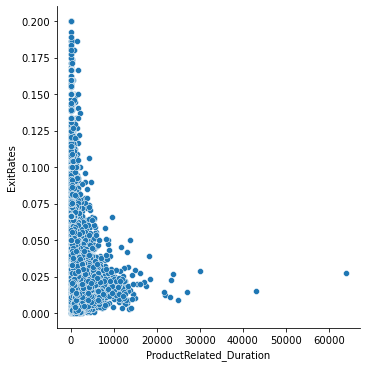

In [83]:
sns.relplot(x="ProductRelated_Duration",y="ExitRates",kind="scatter",data=df)

## Model Realisation

#### One Hot Encoding

In [84]:
df = pd.get_dummies(df, drop_first=True)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12316 non-null  float64
 1   Administrative_Duration        12316 non-null  float64
 2   Informational                  12316 non-null  float64
 3   Informational_Duration         12316 non-null  float64
 4   ProductRelated                 12316 non-null  float64
 5   ProductRelated_Duration        12316 non-null  float64
 6   BounceRates                    12316 non-null  float64
 7   ExitRates                      12316 non-null  float64
 8   PageValues                     12330 non-null  float64
 9   SpecialDay                     12330 non-null  float64
 10  OperatingSystems               12330 non-null  int64  
 11  Browser                        12330 non-null  int64  
 12  Region                         12330 non-null 

### Missing Value Treatment

In [101]:
df.isna().sum()

Administrative                   14
Administrative_Duration          14
Informational                    14
Informational_Duration           14
ProductRelated                   14
ProductRelated_Duration          14
BounceRates                      14
ExitRates                        14
PageValues                        0
SpecialDay                        0
OperatingSystems                  0
Browser                           0
Region                            0
TrafficType                       0
Weekend                           0
Revenue                           0
Month_Dec                         0
Month_Feb                         0
Month_Jul                         0
Month_June                        0
Month_Mar                         0
Month_May                         0
Month_Nov                         0
Month_Oct                         0
Month_Sep                         0
VisitorType_Other                 0
VisitorType_Returning_Visitor     0
dtype: int64

In [103]:
df.fillna(value=0,inplace=True)

#### train_test_split

In [104]:
X=df.drop(columns='Revenue')
y=df.Revenue

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

## Boosting Technique

In [106]:
from xgboost import XGBClassifier

In [107]:
xgb = XGBClassifier()

In [108]:
xgb.fit(X_train,y_train)

C:\Users\Oorja\anaconda3\envs\xgboostvenv\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:47:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [109]:
preds = xgb.predict(X_test)

In [129]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, f1_score

### Train accuracy score

In [111]:
accuracy_score(y_train, xgb.predict(X_train))

0.9837793998377939

### Test accuracy score

In [112]:
accuracy_score(y_test, preds)

0.8917274939172749

#### Inference: This model is overfitting
## Let's try ensemble technique

In [113]:
from sklearn.ensemble import RandomForestClassifier

In [168]:
rfc = RandomForestClassifier(max_depth=11,class_weight={0:1,1:5})

In [169]:
rfc.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 1, 1: 5}, max_depth=11)

In [170]:
preds_ensemble = rfc.predict(X_test)

### Train accuracy score

In [171]:
accuracy_score(y_train, rfc.predict(X_train))

0.9349148418491484

### Test accuracy score

In [172]:
accuracy_score(y_test, preds_ensemble)

0.889294403892944

In [173]:
f1_score(y_test, preds_ensemble)

0.6936026936026936